# 熟悉Pandas Sklearn

## CSV to DataFrame 

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

data_train = pd.read_csv('./input/titanic/train.csv')
data_test = pd.read_csv('./input/titanic/test.csv')

In [213]:
data_train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
827,828,1,2,"Mallet, Master. Andre",male,1.0,0,2,S.C./PARIS 2079,37.0042,NaN,C
226,227,1,2,"Mellors, Mr. William John",male,19.0,0,0,SW/PP 751,10.5000,NaN,S
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
690,691,1,1,"Dick, Mr. Albert Adrian",male,31.0,1,0,17474,57.0000,B20,S
770,771,0,3,"Lievens, Mr. Rene Aime",male,24.0,0,0,345781,9.5000,NaN,S
384,385,0,3,"Plotcharsky, Mr. Vasil",male,NaN,0,0,349227,7.8958,NaN,S
477,478,0,3,"Braund, Mr. Lewis Richard",male,29.0,1,0,3460,7.0458,NaN,S
132,133,0,3,"Robins, Mrs. Alexander A (Grace Charity Laury)",female,47.0,1,0,A/5. 3337,14.5000,NaN,S
141,142,1,3,"Nysten, Miss. Anna Sofia",female,22.0,0,0,347081,7.7500,NaN,S
82,83,1,3,"McDermott, Miss. Brigdet Delia",female,NaN,0,0,330932,7.7875,NaN,Q


## 可视化数据对于识别模型中潜在的模式十分重要

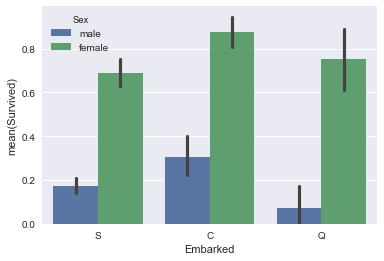

In [214]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data=data_train)

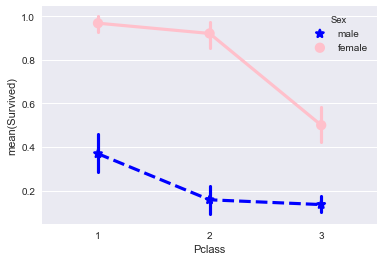

In [215]:
sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data_train,palette={'male':'blue','female':'pink'},markers=['*','o'],linestyles=['--','-'])

# 特征转换
1. 除了'sex'特征之外,'age'是其次重要的特征,如果按照数据集中age的原始值来搞显然太离散了容易降低泛化能力导致过拟合,所以需要处理age将people划分到不同的年龄段组成的组中
1. Cabin特征每行记录都是以一个字母开头,显然第一个字母比后边的数字的更重要,所以把第一个字母单独抽取出来作为特征
1. Fare是另一个特征值连续的特征,需要简化,通过data_train.Fare.describe()获取特征的分布,
1. 从name特征中抽取信息而不是使用全名,抽取last name 和 name 前缀称谓(Mr Mrs )然后拼起来作为新的特征
1. 最后丢弃掉没有太大用处的特征(比如Ticket Name)

In [216]:
data_train.Fare.describe()


count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [217]:
data_train.Sex.describe()

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object

In [218]:
data_train.Name.describe()

count                                                   891
unique                                                  891
top       Turpin, Mrs. William John Robert (Dorothy Ann ...
freq                                                      1
Name: Name, dtype: object

In [219]:
def simplify_ages(df):
    print('_'*10)
    print(df.Age.head(10))
    df.Age = df.Age.fillna(-0.5)
    print('_'*10)
    print(df.Age.head(10))
    bins = (-1,0,5,12,18,25,35,60,120)
    group_names = ['Unknown','Baby','Child','Teenager','Student','Young adult','Adult','Senior']
    categories = pd.cut(df.Age,bins,labels=group_names)    
    df.Age = categories
    print('_'*10)
    print(df.Age.head(10))
    return df

def simplify_cabins(df):
    df.Cabin = df.Cabin.fillna('N')
    df.Cabin = df.Cabin.apply(lambda x:x[0])
    return df

def simplify_fares(df):
    df.Fare = df.Fare.fillna(-0.5)
    bins = (-1,0,8,15,31,1000)
    group_names = ['Unknown','1_quartile','2_quartile','3_quartile','4_quartile']
    categories = pd.cut(df.Fare,bins,labels=group_names)
    df.Fare = categories
    return df

def format_name(df):
    df['Lname'] = df.Name.apply(lambda x:x.split(' ')[0])
    df['NamePrefix'] = df.Name.apply(lambda x:x.split(' ')[1])
    return df

def drop_features(df):
    return df.drop(['Ticket','Name','Embarked'],axis=1)

def transform_features(df):
    df = simplify_ages(df)
    df = simplify_cabins(df)
    df = simplify_fares(df)
    df = format_name(df)
    df = drop_features(df)
    return df

data_train = transform_features(data_train)
data_test = transform_features(data_test)
print('='*20)
data_train.sample(20)

__________
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
__________
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    -0.5
6    54.0
7     2.0
8    27.0
9    14.0
Name: Age, dtype: float64
__________
0        Student
1          Adult
2    Young adult
3    Young adult
4    Young adult
5        Unknown
6          Adult
7           Baby
8    Young adult
9       Teenager
Name: Age, dtype: category
Categories (8, object): [Adult < Baby < Child < Senior < Student < Teenager < Unknown < Young adult]
__________
0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64
__________
0    34.5
1    47.0
2    62.0
3    27.0
4    22.0
5    14.0
6    30.0
7    26.0
8    18.0
9    21.0
Name: Age, dtype: float64
__________
0    Young adult
1          Adult
2         Senior
3    Young adult
4        Student
5       Teenager
6    Young adult
7    Young ad

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Lname,NamePrefix
558,559,1,1,female,Adult,1,1,4_quartile,E,"Taussig,",Mrs.
342,343,0,2,male,Young adult,0,0,2_quartile,N,"Collander,",Mr.
449,450,1,1,male,Adult,0,0,3_quartile,C,"Peuchen,",Major.
26,27,0,3,male,Unknown,0,0,1_quartile,N,"Emir,",Mr.
840,841,0,3,male,Student,0,0,1_quartile,N,"Alhomaki,",Mr.
191,192,0,2,male,Student,0,0,2_quartile,N,"Carbines,",Mr.
158,159,0,3,male,Unknown,0,0,2_quartile,N,"Smiljanic,",Mr.
244,245,0,3,male,Young adult,0,0,1_quartile,N,"Attalah,",Mr.
773,774,0,3,male,Unknown,0,0,1_quartile,N,"Elias,",Mr.
774,775,1,2,female,Adult,1,3,3_quartile,N,"Hocking,",Mrs.


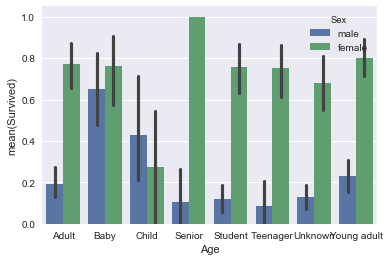

In [220]:
sns.barplot(x='Age',y='Survived',hue='Sex',data=data_train)

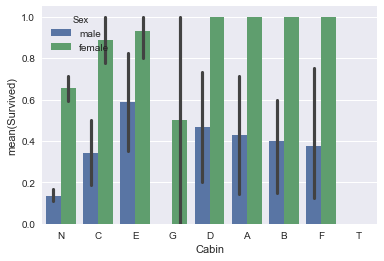

In [221]:
sns.barplot(x='Cabin',y='Survived',hue='Sex',data=data_train)

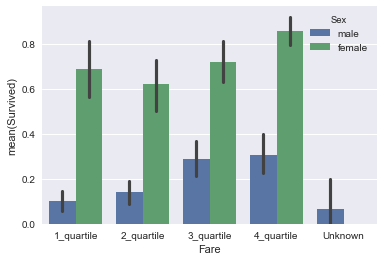

In [222]:
sns.barplot(x='Fare',y='Survived',hue='Sex',data=data_train)

# 特征处理的最后阶段
特征预处理的最后阶段是对标签型的数据标准化,skLearn里的LabelEncoder可以将唯一的string值转换成number数值,把数据变得对于各种算法来说更灵活可用.结果是对于人类而言不是太友好,但是对于机器刚刚好的一堆数值.

In [ ]:
from sklearn import preprocessing
def encode_features(df_train,df_test):
    features = ['Fare']